# Jellium
[?](?)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

from hnc.hnc.PIE import Plasma_of_Ions_and_Electrons as PLASMA

from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
                
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
""")


ModuleNotFoundError: No module named 'mendeleev'


### Set Parameters in Paper and Plot

In [2]:
name = 'Jellium'
Z, A = 1,1 

Te_eV = 1 # eV
rs_AU = 1
rs_cm = rs_AU/cm_to_AU
ne_cc = n_from_rs(rs_cm)


#### Run Ornstein-Zernike Closure

In [3]:
P_hnc_to_bar = lambda P_hnc: (P_hnc/rs_AU**3) *  AU_to_bar 
P_hnc_to_Mbar = lambda P_hnc: 1e-6*P_hnc_to_bar(P_hnc)

def get_jellium_P_Mbar(jellium_hnc):
    # jellium_hnc.h_r_matrix -= 1
    P_hnc = jellium_hnc.excess_pressure_matrix()
    # jellium_hnc.h_r_matrix += 1
    return P_hnc_to_Mbar(P_hnc)[0,0]


In [4]:
jellium = PLASMA(1, 1, ne_cc, 1, Te_eV, Zbar=1, find_βuee=True,
                 βu_options = {'add_bridge':False,'bridge':'ocp', 'pseudopotential':False}, 
                 qsp_options= {'r_c':0,'which_Tij':'geometric'},
                 hnc_options= {'kappa_multiscale':10, 'R_max':20,'N_bins':1000, 
                               'h_max':2e2,'oz_method':'standard'},
                 hnc_solve_options={'alpha_Picard':0.5, 'num_iterations':1e4})

jellium.run_jellium_hnc()
# Reset βvee
βvee_Pauli   = jellium.qsp.βv_Pauli(  jellium.jellium_hnc.r_array , jellium.qsp.Λee )
βvee_Pauli   = jellium.βP_ee
βvee_Deutsch = jellium.qsp.βv_Deutsch( jellium.qsp.Γee, jellium.jellium_hnc.r_array , jellium.qsp.Λee )
jellium.jellium_hnc.set_βu_matrix(np.array([[βvee_Pauli ]]))
jellium.jellium_hnc.HNC_solve(**jellium.hnc_solve_options)



Te_in_eV: 1.000
Ti_in_eV: 1.000


/home/zach/plasma/hnc/hnc/PIE.py:181: RuntimeWarning: overflow encountered in exp
  integrand = lambda t: t*np.sin(sin_arg*t)/(1+np.exp(t**2-η))


[-1.09479670e-13 -4.33702927e-13 -9.17028087e-13 -1.48234321e-12
 -2.04292910e-12 -2.51519246e-12 -2.83059702e-12 -2.94509964e-12
 -2.84480392e-12 -2.54712308e-12]
[-1.96390508e-13 -2.80980485e-14 -5.94084872e-13 -1.80827946e-12
 -3.49328715e-12 -5.40596187e-12 -7.27214271e-12 -8.82560544e-12
 -9.84570872e-12 -1.01884252e-11]
1.0863200796010147e-07
0: Initial condition Total Error: 9.267e-02


/home/zach/plasma/hnc/hnc/PIE.py:188: RuntimeWarning: overflow encountered in exp
  f_of_k = 1/(  1+np.exp((dense_hnc.k_array/self.qsp.ri)**2/(2*m_e*self.qsp.Te) - η) )


Exiting status 0, reverting to best index so far: 35
Final iter:36, Total Error: 6.570e-09
0: Initial condition Total Error: 5.543e-02
Exiting status 0, reverting to best index so far: 28
Final iter:29, Total Error: 5.854e-09


0

In [5]:
jellium.βP_ee

array([1.04599826e+00, 1.04599826e+00, 1.04599826e+00, 1.04599826e+00,
       1.04599826e+00, 1.04103798e+00, 1.03607770e+00, 1.03111741e+00,
       1.02615713e+00, 1.02119685e+00, 1.01331464e+00, 1.00543242e+00,
       9.97550206e-01, 9.89667991e-01, 9.81785776e-01, 9.71487598e-01,
       9.61189419e-01, 9.50891240e-01, 9.40593062e-01, 9.30294883e-01,
       9.18171746e-01, 9.06048608e-01, 8.93925471e-01, 8.81802334e-01,
       8.69679196e-01, 8.56334910e-01, 8.42990623e-01, 8.29646336e-01,
       8.16302050e-01, 8.02957763e-01, 7.88954883e-01, 7.74952002e-01,
       7.60949122e-01, 7.46946242e-01, 7.32943362e-01, 7.18771099e-01,
       7.04598837e-01, 6.90426574e-01, 6.76254311e-01, 6.62082049e-01,
       6.48143003e-01, 6.34203956e-01, 6.20264910e-01, 6.06325864e-01,
       5.92386818e-01, 5.78996615e-01, 5.65606411e-01, 5.52216208e-01,
       5.38826005e-01, 5.25435801e-01, 5.12829943e-01, 5.00224085e-01,
       4.87618227e-01, 4.75012369e-01, 4.62406511e-01, 4.50750243e-01,
      

#### Pressures

In [9]:
P_Fermi_Mbar = 2/5 * jellium.qsp.E_F/(4/3*π*(jellium.qsp.ri)**3) * AU_to_bar/1e6

P_hnc_to_Mbar(jellium.jellium_hnc.ideal_pressure()),get_jellium_P_Mbar( jellium.jellium_hnc), P_Fermi_Mbar

(51.803654302600016, 465.74712400603397, 51.739302540025804)

##### Plot Radial Dsitribution Function

Missing colon in file '~/plasma/hnc/hnc_paper.mplstyle', line 40 ("text.latex.preamble = r'\\boldmath'")


(0.0, 5.0)

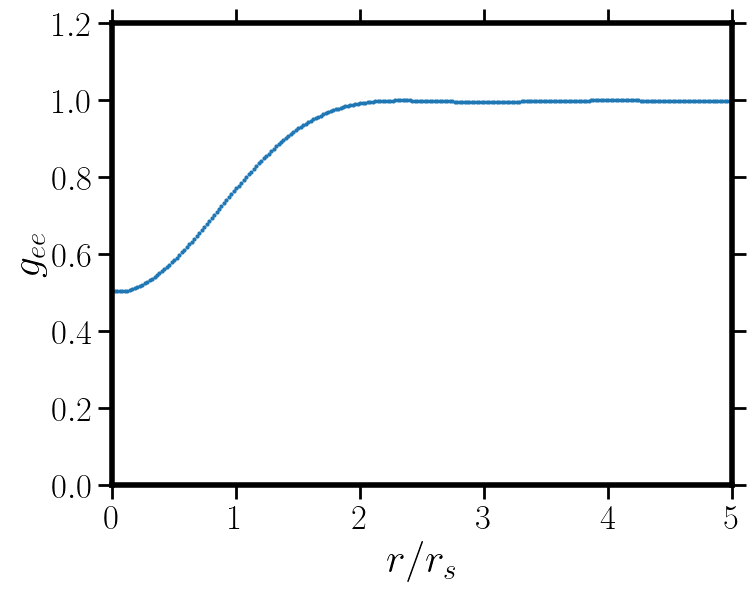

In [10]:
plt.style.use('~/plasma/hnc/hnc_paper.mplstyle')

fig, ax = plt.subplots()

ax.plot(jellium.jellium_hnc.r_array, jellium.jellium_hnc.h_r_matrix[0,0]+1,'.', label='Default Pauli')
# ax.plot(jellium.jellium_hnc.r_array, jellium.jellium_hnc.h_r_matrix[0,0]+1, label='Default Pauli')


ax.set_xlabel(r"$r/r_s$")
ax.set_ylabel(r"$g_{ee}$")

ax.set_ylim(0,1.2)
ax.set_xlim(0,5)

#### Plot βu

Missing colon in file '~/plasma/hnc/hnc_paper.mplstyle', line 40 ("text.latex.preamble = r'\\boldmath'")


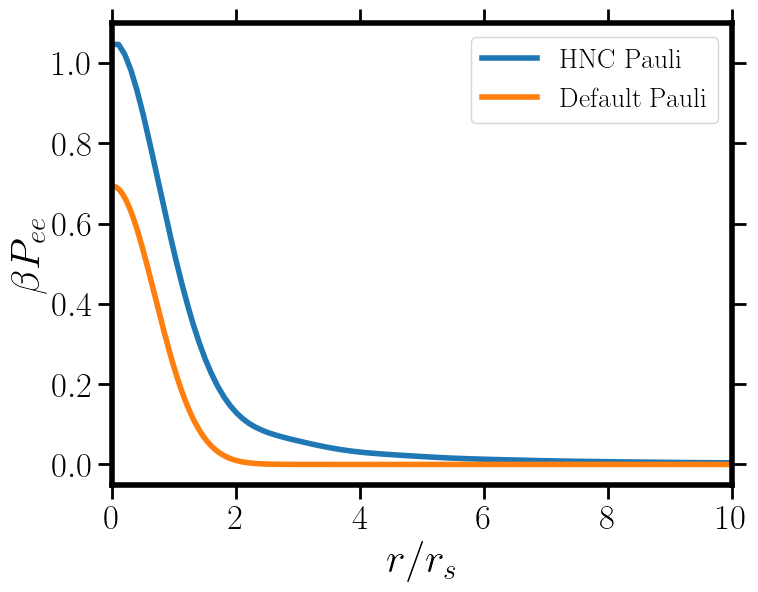

In [8]:
plt.style.use('~/plasma/hnc/hnc_paper.mplstyle')

fig, ax = plt.subplots()

ax.plot(jellium.jellium_hnc.r_array, jellium.βP_ee, label='HNC Pauli')
ax.plot(jellium.jellium_hnc.r_array, jellium.qsp.βv_Pauli(  jellium.jellium_hnc.r_array , jellium.qsp.Λee ), label='Default Pauli')

ax.set_xlabel(r"$r/r_s$")
ax.set_ylabel(r"$\beta P_{ee}$")

# ax.set_ylim(0,1.2)
ax.set_xlim(0,10)
ax.legend()